## **Import library**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Set style visualisasi**

In [7]:
sns.set(style='whitegrid')

## **Load data**

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/05.%20Week%205/Datasets/netflix_titles.csv')

# Copy untuk EDA
df_eda = df.copy()

## **Feature Engineering**

In [9]:
df_eda['date_added'] = pd.to_datetime(df_eda['date_added'].str.strip(), errors='coerce')
df_eda['year_added'] = df_eda['date_added'].dt.year
df_eda['month_added'] = df_eda['date_added'].dt.month_name()
df_eda['day_added'] = df_eda['date_added'].dt.day_name()

# Ekstrak angka dan tipe dari durasi
df_eda['duration_int'] = df_eda['duration'].str.extract('(\d+)').astype(float)
df_eda['duration_type'] = df_eda['duration'].str.extract('([a-zA-Z]+)')

# Fill NaN untuk analisis kategorikal
df_eda['director'].fillna('Unknown', inplace=True)
df_eda['cast'].fillna('Unknown', inplace=True)
df_eda['country'].fillna('Unknown', inplace=True)
df_eda['rating'].fillna('Unknown', inplace=True)

<ipython-input-9-91a276ee9807>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda['director'].fillna('Unknown', inplace=True)
<ipython-input-9-91a276ee9807>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## **EDA & Visualisasi**

<ipython-input-10-143d03c9a0db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, x='type', palette='Set2')


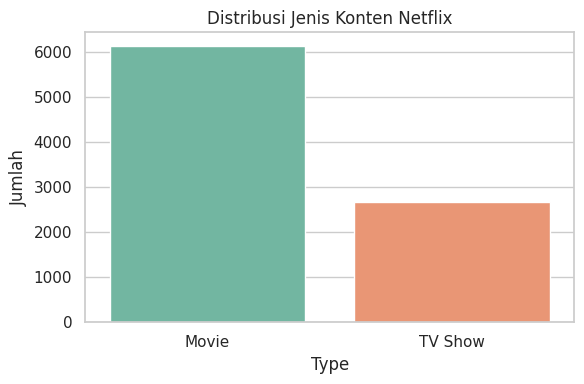

In [10]:
# 1. Jenis konten (Movie / TV Show)
plt.figure(figsize=(6,4))
sns.countplot(data=df_eda, x='type', palette='Set2')
plt.title('Distribusi Jenis Konten Netflix')
plt.xlabel('Type')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()



> Visualisasi ini menunjukkan bahwa mayoritas konten di Netflix berupa Movie, dengan jumlah yang jauh lebih besar dibandingkan TV Show. Ini menunjukkan fokus utama Netflix pada film.





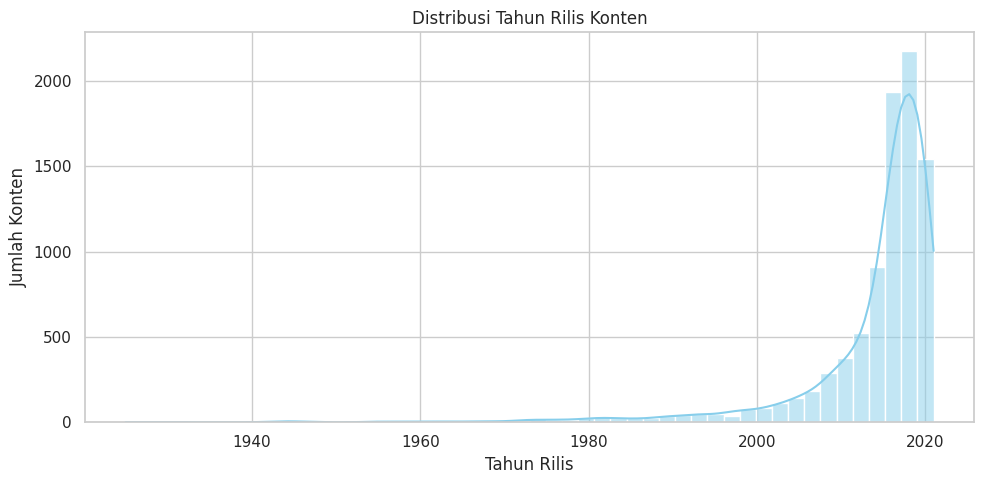

In [11]:
# 2. Distribusi tahun rilis
plt.figure(figsize=(10,5))
sns.histplot(df_eda['release_year'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Tahun Rilis Konten')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Konten')
plt.tight_layout()
plt.show()
# Penjelasan: histogram menampilkan frekuensi, sementara KDE (Kernel Density Estimation) memperkirakan distribusi probabilitas.




> Histogram memperlihatkan distribusi frekuensi konten berdasarkan tahun rilis. Mayoritas konten dirilis setelah tahun 2000, dengan puncak pada tahun 2017–2019.



<ipython-input-12-a88943537dfb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, x='rating', order=top_ratings, palette='coolwarm')


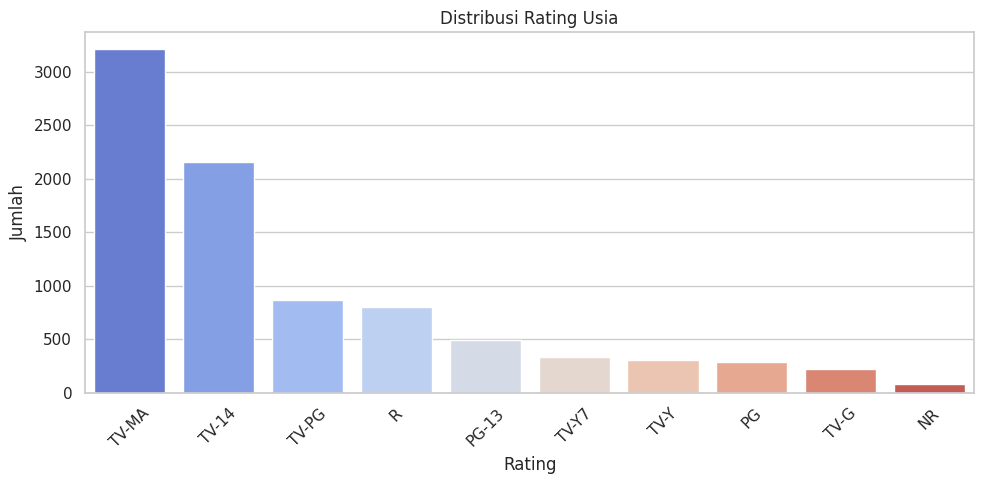

In [12]:
# 3. Rating usia
plt.figure(figsize=(10,5))
top_ratings = df_eda['rating'].value_counts().index[:10]
sns.countplot(data=df_eda, x='rating', order=top_ratings, palette='coolwarm')
plt.title('Distribusi Rating Usia')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



> Rating paling umum adalah TV-MA, yang artinya konten ditujukan untuk dewasa. Disusul oleh TV-14 dan TV-PG, menunjukkan Netflix banyak menyediakan konten untuk remaja ke atas.



<ipython-input-13-c19ea320ea73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


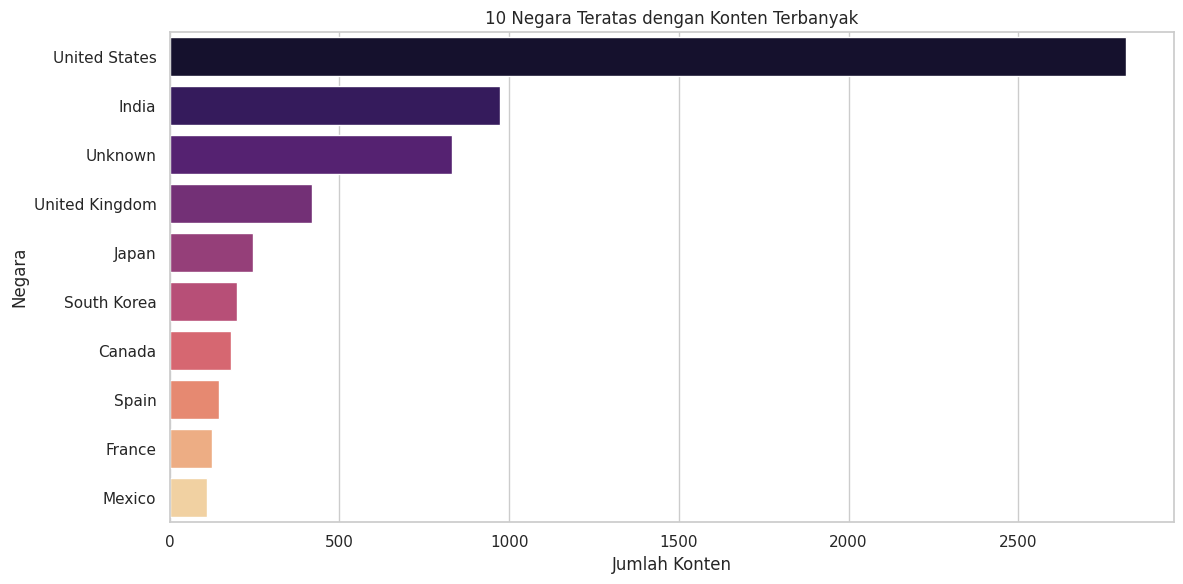

In [13]:
# 4. Negara terbanyak
plt.figure(figsize=(12,6))
top_countries = df_eda['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('10 Negara Teratas dengan Konten Terbanyak')
plt.xlabel('Jumlah Konten')
plt.ylabel('Negara')
plt.tight_layout()
plt.show()



> Konten Netflix paling banyak berasal dari United States, diikuti oleh India dan United Kingdom. Ini menunjukkan dominasi industri hiburan dari negara-negara tersebut.



<ipython-input-14-daaed586b271>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='cubehelix')


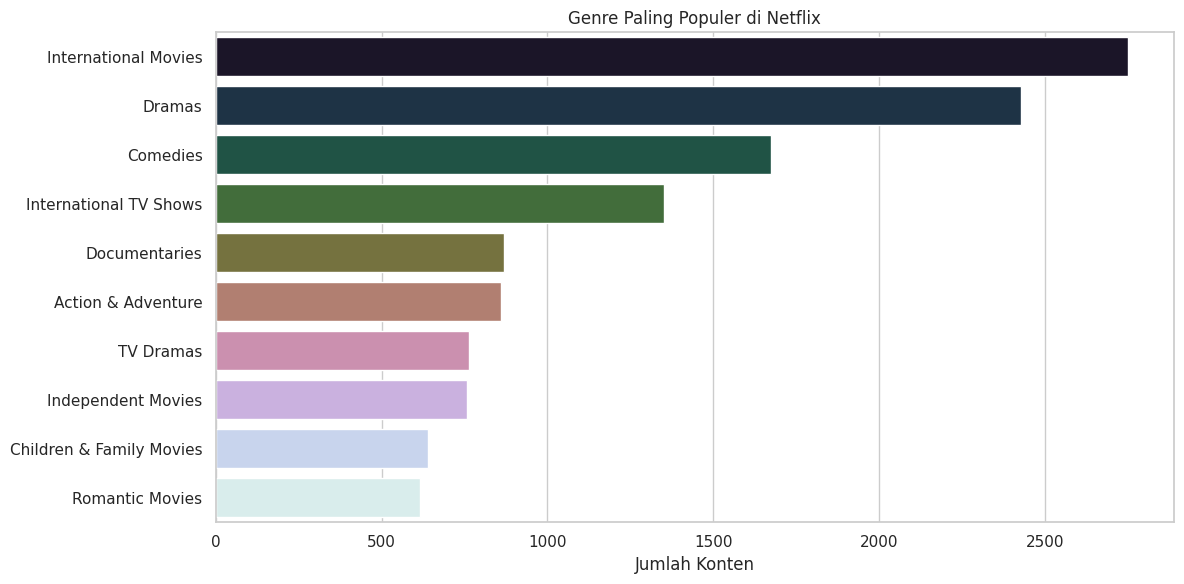

In [14]:
# 5. Genre paling populer
plt.figure(figsize=(12,6))
# Split listed_in menjadi genre terpisah
from collections import Counter
genres = df_eda['listed_in'].str.split(', ')
flat_genres = [genre for sublist in genres.dropna() for genre in sublist]
genre_counts = Counter(flat_genres)
top_genres = dict(genre_counts.most_common(10))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='cubehelix')
plt.title('Genre Paling Populer di Netflix')
plt.xlabel('Jumlah Konten')
plt.tight_layout()
plt.show()



> Genre yang paling banyak muncul adalah Dramas, International Movies, dan Comedies. Hal ini menunjukkan bahwa pengguna Netflix cenderung menyukai konten drama dan komedi, serta konten internasional.



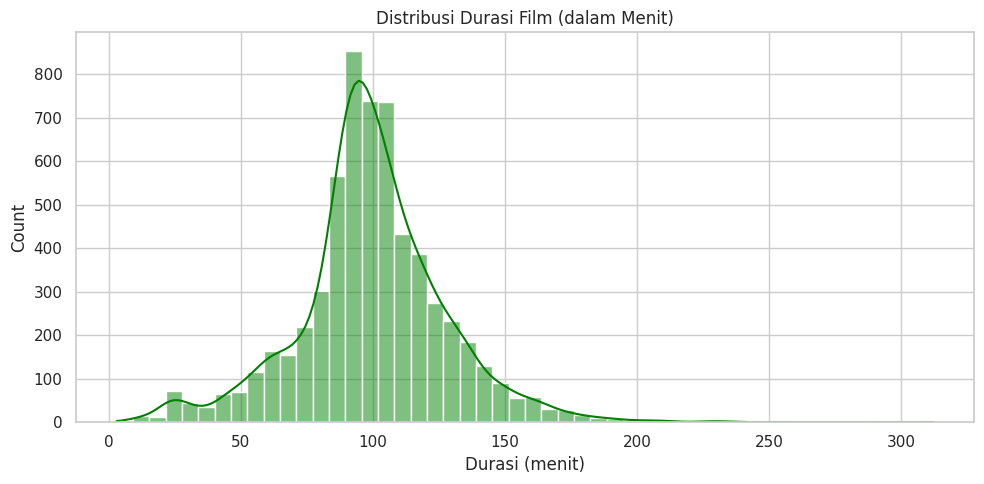

In [15]:
# 6. Distribusi durasi Movie (dalam menit)
plt.figure(figsize=(10,5))
sns.histplot(df_eda[df_eda['type'] == 'Movie']['duration_int'], bins=50, color='green', kde=True)
plt.title('Distribusi Durasi Film (dalam Menit)')
plt.xlabel('Durasi (menit)')
plt.tight_layout()
plt.show()



> Sebagian besar film berdurasi antara 80 hingga 120 menit, yang merupakan panjang film standar di industri bioskop.
* Menggunakan histogram dan KDE untuk melihat frekuensi serta bentuk distribusinya.


<ipython-input-16-7f41302b64b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda[df_eda['type'] == 'TV Show'], x='duration_int', palette='viridis')


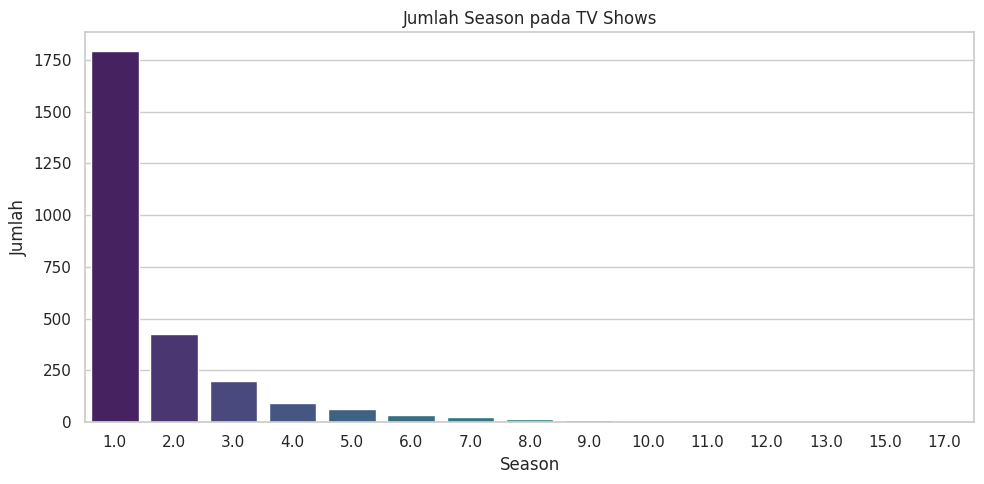

In [16]:
# 7. Distribusi jumlah season untuk TV Show
plt.figure(figsize=(10,5))
sns.countplot(data=df_eda[df_eda['type'] == 'TV Show'], x='duration_int', palette='viridis')
plt.title('Jumlah Season pada TV Shows')
plt.xlabel('Season')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()



> Kebanyakan TV Show hanya memiliki 1 atau 2 season, menandakan banyaknya mini-series atau serial eksklusif yang tidak panjang.



<ipython-input-17-8f4c88bbcb6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, x='year_added', palette='Blues_r')


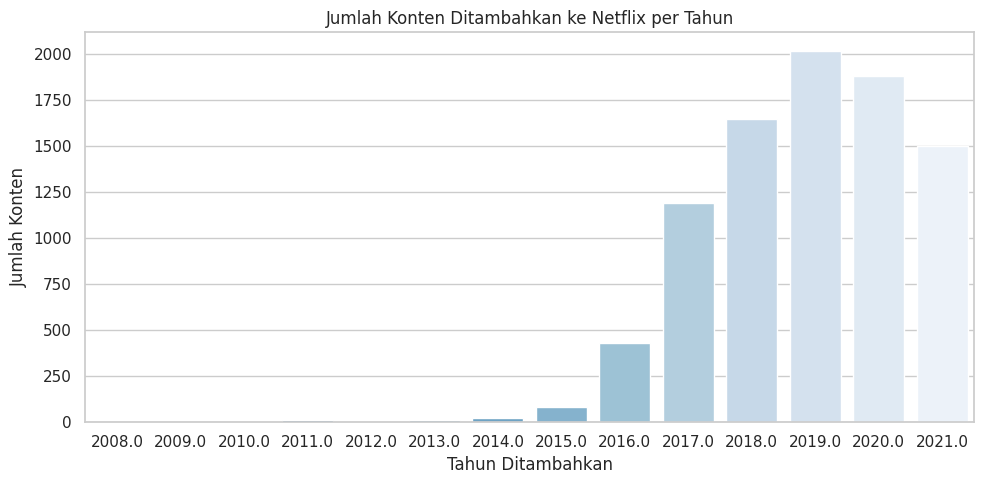

In [17]:
# 8. Jumlah penambahan konten per tahun
plt.figure(figsize=(10,5))
sns.countplot(data=df_eda, x='year_added', palette='Blues_r')
plt.title('Jumlah Konten Ditambahkan ke Netflix per Tahun')
plt.xlabel('Tahun Ditambahkan')
plt.ylabel('Jumlah Konten')
plt.tight_layout()
plt.show()



> Penambahan konten meningkat pesat setelah tahun 2016, menunjukkan ekspansi Netflix secara global dan peningkatan investasi terhadap konten orisinal.



# **Persamaan Matematika**

Histogram menghitung frekuensi nilai dalam interval tertentu. KDE (Kernel Density Estimation) memperkirakan distribusi probabilitas dengan fungsi:
$$
\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)
$$

di mana 𝐾 adalah fungsi kernel dan ℎ adalah bandwidth.

